## Aim: To implement BFS,DFS and Best First Search


## Theory
To search for a solution a agent can use different searches
1. Informed search: have a idea of goal
   - best first search
3. Uninformed search: no idea of goal
   - breadth first search
   - depth first search

## Code

In [2]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

In [18]:
graph.values()

dict_values([{'B', 'C'}, {'E', 'D', 'A'}, {'F', 'A'}, {'B'}, {'B', 'F'}, {'E', 'C'}])

In [19]:
graph['A']

{'B', 'C'}

In [20]:
type(graph['A'])

set

In [14]:

graph_nodes=[("A"), ("B" ), ("C" ), ("D" ), ("E" ), ("F" ), ("G" ), ("H" )]

graph_edges=[("A", "B"), ("A", "C"), ("B", "D"), ("B", "E"), ("C", "F"), ("C", "G"), ("E","H")]

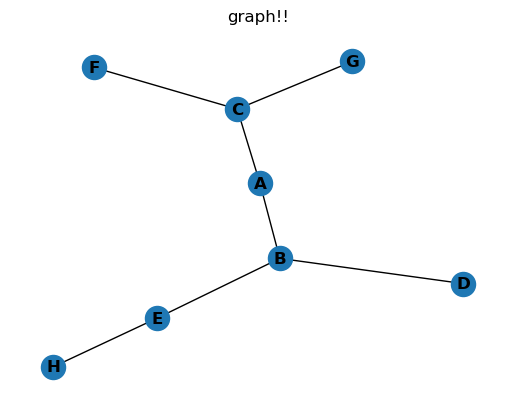

In [26]:
graph
import networkx as nx
import matplotlib.pyplot as plt
graph
G=nx.Graph()
G.add_nodes_from(graph_nodes)
G.add_edges_from(graph_edges)
subax1 = plt.plot()
plt.title("graph!!")
nx.draw(G, with_labels=True, font_weight='bold')


In [3]:
graph

{'A': {'B', 'C'},
 'B': {'A', 'D', 'E'},
 'C': {'A', 'F'},
 'D': {'B'},
 'E': {'B', 'F'},
 'F': {'C', 'E'}}

In [5]:


def dfs(graph, start):
    visited, stack = [], [start] 
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.append(vertex)
            stack.extend(graph[vertex] - set(visited))
    return visited

dfs(graph, 'A') 

['A', 'C', 'F', 'E', 'B', 'D']

# Breath-First Search

An alternative algorithm called Breath-First search provides us with the ability to return the same results as DFS but with the added guarantee to return the shortest-path first. This algorithm is a little more tricky to implement in a recursive manner instead using the queue data-structure, as such I will only being documenting the iterative approach. The actions performed per each explored vertex are the same as the depth-first implementation, however, replacing the stack with a queue will instead explore the breadth of a vertex depth before moving on. This behavior guarantees that the first path located is one of the shortest-paths present, based on number of edges being the cost factor.

In [9]:

def bfs(graph, start):
    visited, queue = [], [start] 
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.append(vertex)
            queue.extend(graph[vertex] - set(visited)) 
    return visited

bfs(graph, 'A') 

['A', 'B', 'C', 'E', 'D', 'F']

## Best First Search algorithm

In [1]:
import heapq

class Graph:
    def __init__(self):
        self.graph = {}
        self.heuristics = {}

    def add_edge(self, node, neighbor, cost):
        if node not in self.graph:
            self.graph[node] = []
        self.graph[node].append((neighbor, cost))

    def set_heuristic(self, node, heuristic):
        self.heuristics[node] = heuristic

def best_first_search(graph, start, goal):
    frontier = [(graph.heuristics[start], start, [start], 0)]  # (heuristic, node, path, cost)
    visited = set()

    while frontier:
        _, current, path, cost = heapq.heappop(frontier)

        if current == goal:
            return path, cost

        if current not in visited:
            visited.add(current)
            for neighbor, edge_cost in graph.graph.get(current, []):
                if neighbor not in visited:
                    new_path = path + [neighbor]
                    new_cost = cost + edge_cost
                    heapq.heappush(frontier, (graph.heuristics[neighbor], neighbor, new_path, new_cost))

    return [], float('inf')

# Small example
g = Graph()
g.add_edge('A', 'B', 3)
g.add_edge('A', 'C', 1)
g.add_edge('C', 'D', 4)
g.set_heuristic('A', 5)
g.set_heuristic('B', 2)
g.set_heuristic('C', 3)
g.set_heuristic('D', 0)

path, cost = best_first_search(g, 'A', 'D')
print(f"Path: {' -> '.join(path) if path else 'No path found'}")
print(f"Total cost: {cost}")

Path: A -> C -> D
Total cost: 5


## Result
1. DFS
{'A', 'B', 'C', 'D', 'E', 'F'}
2. BFS
{'A', 'B', 'C', 'D', 'E', 'F'}   
3. Best First Search
Path: A -> C -> D
Total cost: 5

## Learning Outcome
#### I learned to implement DFS, BFS, and best first search algorithms

In [27]:
def goal_test(state):
    return state == 'G'


In [28]:
lambda state: state == 'G'

<function __main__.<lambda>(state)>

In [29]:
statemap = {'S': ['A', 'B'],
            'A': ['S', 'C', 'D'],
            'B': ['S', 'D', 'E'],
            'C': ['A', 'F'],
            'D': ['A', 'B', 'F', 'H'],
            'E': ['B', 'H'],
            'F': ['C', 'D', 'G'],
            'G': ['F', 'H'],
            'H': ['D', 'E', 'G']}

In [38]:
statemap['D'][0] # returns state A
statemap['D'][1] # returns state B
statemap['D'][2] # returns state F
statemap['D'][3] # returns state H

'H'

In [39]:
def statemap_successor(state, action):
    return statemap[state][action]

In [41]:
print(statemap_successor('G', 1)) # output 'G'

H


In [44]:
class LightBox:
    def __init__(self):
        self.state = "off"

    def set_output(self, inp):
        if inp == 1 and self.state == "off":
            self.state = "on"
            return self.state
        if inp == 1 and self.state == "on":
            self.state = "off"
            return self.state
        return self.state

    def transduce(self, list_inp):
        for inp in list_inp:
            print(self.set_output(inp))

lb1 = LightBox()
lb1.transduce([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

off
off
on
on
on
on
on
off
on
off
on
on
off


In [45]:

from abc import ABC, abstractmethod

class StateMachine(ABC):

    def start(self):
        self.state = self.start_state

    def step(self, inp):
        ns, o = self.get_next_values(self.state, inp)
        self.state = ns
        return o

    @property
    @abstractmethod
    def start_state(self):
        pass

    @abstractmethod
    def get_next_values(self, state, inp):
        pass

class LightBoxSM(StateMachine):

    @property
    def start_state(self):
        return "off"

    def get_next_values(self, state, inp):

        if state == "off":
            if inp == 1:
                next_state = "on"
            else:
                next_state = "off"
        elif state == "on":
            if inp == 1:
                next_state = "off"
            else:
                next_state = "on"
        output = next_state
        return next_state, output

lb2 = LightBoxSM()
lb2.start()
print(lb2.step(0))
print(lb2.step(0))
print(lb2.step(1))
print(lb2.step(0))
print(lb2.step(0))
print(lb2.step(0))
print(lb2.step(0))
print(lb2.step(1))
print(lb2.step(1))
print(lb2.step(1))
print(lb2.step(1))
print(lb2.step(0))
print(lb2.step(1))

off
off
on
on
on
on
on
off
on
off
on
on
off


In [46]:
from abc import ABC, abstractmethod

class StateMachine(ABC):

    def start(self):
        self.state = self.start_state

    def step(self, inp):
        ns, o = self.get_next_values(self.state, inp)
        self.state = ns
        return o

    @property
    @abstractmethod
    def start_state(self):
        pass

    @abstractmethod
    def get_next_values(self, state, inp):
        pass

# cannot instantiate StateMachine class
# this will generate error

s = StateMachine()

TypeError: Can't instantiate abstract class StateMachine without an implementation for abstract methods 'get_next_values', 'start_state'

In [42]:
from abc import abstractmethod

class StateSpaceSearch(StateMachine):
    @property
    @abstractmethod
    def statemap(self):
        pass

    @property
    @abstractmethod
    def legal_inputs(self):
        pass

    @property
    @abstractmethod
    def start_state(self):
        return self.__start_state

    @start_state.setter
    @abstrctmethod
    def start_state(self, value):
        self.__start_state = value


NameError: name 'StateMachine' is not defined

In [35]:
class MapSM(StateSpaceSearch):

    def __init__(self, start):
        self.start_state = start

    @property
    def statemap(self):
        statemap = {"S": ["A", "B"],
                    "A": ["S", "C", "D"],
                    "B": ["S", "D", "E"],
                    "C": ["A", "F"],
                    "D": ["A", "B", "F", "H"],
                    "E": ["B", "H"],
                    "F": ["C", "D", "G"],
                    "H": ["D", "E", "G"],
                    "G": ["F", "H"]}
        return statemap

NameError: name 'StateSpaceSearch' is not defined

In [31]:
a=MapSM()
a

NameError: name 'MapSM' is not defined